<center><img src='img/cdy.png' style='width:500px; float: left; margin: 0px 30px 15px 0px'></center>

# Clustering models
## Class 25 - Data Science Curriculum 

<br>

#### Women Building Change scholarship program 2023 🇧🇮
June 1, 2023





# ⏪ Recap last class

- Classification models
    - Logistic regression 
    - Naive Bayes
    - Support Vector Machines (SVM)
    - Decision Trees

# 🚀 Today's agenda

- Clustering models

### Classification models in the context of machine learning
<br>
<center><img src='img/clase7/clas2.png' style='height:450px; float: center; margin: 0px 0px 0px 0px'></center>

- Classification models are **SUPERVISED LEARNING** with **discrete** labels. 

### 🤔 What if we don't have labels?

<center><img src='img/clustering.png' style='height:600px; float: center; margin: 0px 0px 0px 0px'></center>

## 🤖 Clustering algorithms

It's the most popular way to do unsupervised learning


#### Data

• We have training observations $\{ x_1, \ldots, x_n\} \in \mathbb{R}^{n}$

• We don't need <i>(have)</i> labels $y_i$

## First (?) clustering application

• In the 1850s, John Snow, a doctor in London, plotted the location of the deaths by cholera in a map


• The locations showed that the cases were clustered in the road intersections where there were contaminated wells 

<br>
<center><img src='img/clase9/img3b.png' style='height:300px'><small>Source: Nina Mishra HP Labs</small></center>

## 🤖 Clustering algorithms
<br>

<b> Objective:</b> Group similar observations together-- "clusters" 

<b> When do we use them?</b> When we don't know what we are looking for

<b>... but be careful! It can quickly become garbage</b>

```python
The dataset should have:
    - High intra-class similarity
    - Low inter-class similarity

```

## 🤖 Clustering algorithms
<br>

The most popular model is **K-MEANS**

# K-means

<center><img src='img/clase9/img7bc.gif' style='height:150px'></center>



<center>K-means an <b><u>iterative</u></b> algorithm whose objective is to partition a set of $N$ observations into $K$ groups in which each observation belongs to the group whose mean value is closest.

### K-means --- Steps

<img src='img/km1.png' style='height:250px; float: left; margin: 0px 50px 0px 0px'>

<b> 1. Initialize</b>
<br><br>A. &nbsp; Choose a number $K$ of clusters
<br><br>B. &nbsp; Randomly choose $K$ points as centroids

<center><img src='img/km2.png' style='height:250px; float: right; margin: 0px 0px 0px 0px'>


<img src='img/km3.png' style='height:250px; float: right; margin: 0px 0px 0px 0px'></center>

<b>2. Repeat</b>
<br><br>A. &nbsp; The $K$ clusters are created by assigning to each observation to its closest centroid
<br><br>B. &nbsp; The new centroid of each one of the $K$ clusters is the mean of their observations

<img src='img/km4.png' style='height:250px; float: left; margin: 0px 50px 0px 0px'>

<b>3. Stop </b>
<br><br>A. &nbsp; Repeat step 1 and 2
<br><br>B. &nbsp; The algorithm ends when one of the following happens:
        - There's no change in the centroids
        - The observations continue to be assigned to the same cluster
        - The maximum number of iterations is reached

#### References:
    
- The math behind it: [Link](https://nlp.stanford.edu/IR-book/html/htmledition/k-means-1.html)

- Visualize: [Video](https://www.youtube.com/watch?v=BVFG7fd1H30)

### 👮‍♀️ Check point!
<br>
<img src='img/clase9/kmeans2.png' style='height:700px; float: right; margin: 0px 50px 0px 0px'>

- What's $K$ in this example?

- Tell me what is happening on each step

# 👩‍💻 Let's code!
<b>Step 1:</b> Load data

In [18]:
import pandas as pd

data = pd.read_csv("lang_clase.csv")
print(f"We have {data.shape[0]} observaitons.")

data.sample(5)

We have 1000 observaitons.


,Text
119,uma denominação parecida com o estádio do be m...
290,les latobices ou latobriges latinisé en latovi...
479,cependant lorsque le ministre de lintérieur ro...
899,la idea de un único emperador soberano se sust...
154,в — годах недалеко от ораниенбаума в деревне у...


<b>Step 2:</b> Feature Engineering 

In [19]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

def pre_process(text):
    text = text.lower()
    text = re.sub(r"[\W\d]+", " ", text)
    return text

tfidf_vect = TfidfVectorizer(preprocessor=pre_process)
tfidf = tfidf_vect.fit_transform(data.Text.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names_out())

<b>Step 3:</b> Train the model

But first we have to pick $K$

# How do we pick the best $K$?

<br>
<center><img src='img/clase9/pickk1.png' style='height:600px'></center>

# How do we pick the best $K$?


#### How many clusters are there here?

<br>
<center><img src='img/cc1.png'></center>

# How do we pick the best $K$?


#### How many clusters are there here?

#### Two?

<br>
<center><img src='img/cc2.png'></center>

# How do we pick the best $K$?


#### How many clusters are there here?

#### Eight?

<br>
<center><img src='img/cc3.png'></center>

### 👮‍♀️ Check point
<br>

• What is the minimum possible value for $K$?

• What is the maximum possible value for $K$?

<b>Step 3:</b> Train the model

**Pick $K$ using the elbow method**

In [40]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [41]:
ks = []
k_inertias = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    k_inertia = kmeans.inertia_
    
    ks.append(k)
    k_inertias.append(k_inertia)

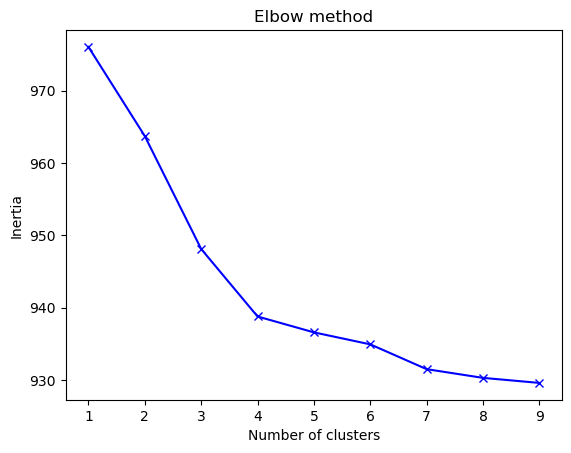

In [22]:
# list(zip(ks,k_inertias))

plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow method")
plt.plot(ks, k_inertias, 'bx-');

In [23]:
k = 4
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)

KMeans(n_clusters=4)

In [24]:
data['cluster'] = model.labels_
data

,Text,cluster
0,a cada etapa do circuito brasileiro banco do b...,2
1,мини-бар — небольшой холодильник с напитками п...,0
2,ломоносов м в «письмо и и шувалову от года» ...,0
3,en les cultivateurs du village se cotisèrent ...,3
4,en el momento de la compra la tarjeta se entre...,1
...,...,...
995,el departamento cuenta con varios canales de t...,1
996,farrington d p b implications of biological fi...,0
997,клевцов в герой несуществующей державы в клев...,0
998,le mars tag heuer annonce à l’occasion du ba...,3


In [25]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [26]:
k_pt = 4
model = KMeans(n_clusters=k_pt)
model.fit(tfidf_matrix)
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

data['cluster'] = model.labels_
clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

print(f"{color.BOLD}CLUSTERS:\n{color.END}")
centroids = model.cluster_centers_
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect.get_feature_names()

for i in range(k_pt):
    print(f"{color.BLUE}Cluster {i}:{color.END}")
    print(f"{color.CYAN}COUNT {color.END} {clust_cnt[i]} comments ({clust_cnt_pct[i]:.2%} of the data)")
    print(f"{color.CYAN}TERMS {color.END}", end=" ")
    for ind in order_centroids[i, :20]:
        print(f'{color.BOLD}{terms[ind]}{color.END}', end=" "),
    print(f"\n{color.CYAN}REPRESENTATIVE COMMENTS{color.END}")
    for comment in data.iloc[nbrs.kneighbors([centroids[i]])[1][0]]['Text'].values:
        print(f"* {comment}")
    print("\n")

CLUSTERS:

Cluster 0:
COUNT  282 comments (28.20% of the data)
TERMS  на года по году для не из был от его что за церкви также ломоносова ломоносов комиссии как он the 
REPRESENTATIVE COMMENTS
* в  году овчинников окончательно вытеснил из основы «локомотива» хасанби биджиева пропустив всего  мяч в  матчах и как следствие получил приглашение в только что образованную сборную россии на её первый в истории матч на стадионе «локомотив» против сборной мексики однако на поле так и не вышел на последующие матчи сборной в течение года овчинников также вызывался но оставался на скамейке запасных
* с октября  года начала действия договора по апрель  года товарооборот между странами увеличился на  экспорт вырос на  импорт — на 
* в апреле  года ломоносов за дерзкое поведение при академических распрях между «русской» и «немецкой» партиями был заключён под стражу на  месяцев только  января  года сенат заслушав доклад следственной комиссии постановил «оного адъюнкта ломоносова для его довольного обу

/Users/vivianamarquez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [27]:
clusters = {0:'Russian',
            1:'French',
            2:'Spanish',
            3:'Portuguese'}

data['cluster'] = data['cluster'].apply(lambda val: clusters[val])
data.sample(5)

,Text,cluster
222,durante a década de patti possuía uma voz doc...,Portuguese
363,la idea de paseo al mar la actual avenida blas...,Spanish
378,en muñoz rodríguez se convirtió en miembro de...,Spanish
232,ивану воловскому бывшему первым помощником сек...,Russian
933,el de enero de el subdirector general de pro...,Spanish


In [28]:
df_centroides = pd.DataFrame(model.cluster_centers_)
df_centroides['cluster'] = clusters.values()
df_centroides

,0,1,2,3,4,5,6,7,8,9,...,20448,20449,20450,20451,20452,20453,20454,20455,20456,cluster
0,2.389265e-03,5.421011e-20,0.000000e+00,5.421011e-20,8.131516e-20,-2.710505e-20,-1.626303e-19,-9.486769e-20,8.131516e-20,2.710505e-19,...,7.546527e-04,-1.084202e-19,1.897354e-19,1.897354e-19,-1.626303e-19,-8.131516e-20,2.710505e-20,1.897354e-19,1.897354e-19,Russian
1,5.684431e-04,4.065758e-20,-4.065758e-20,4.065758e-20,8.131516e-20,9.059643e-04,-1.626303e-19,-8.131516e-20,2.710505e-20,2.710505e-19,...,1.355253e-19,0.000000e+00,7.866307e-04,7.866307e-04,6.484695e-04,-8.131516e-20,0.000000e+00,1.897354e-19,1.897354e-19,French
2,-9.757820e-19,4.065758e-20,-2.710505e-20,3.411909e-04,8.131516e-20,-2.710505e-20,4.947761e-04,-9.486769e-20,3.262654e-04,7.837156e-04,...,2.168404e-19,4.993962e-04,1.626303e-19,1.626303e-19,-1.355253e-19,-8.131516e-20,8.868720e-04,5.043687e-04,5.043687e-04,Spanish
3,-7.589415e-19,4.032070e-04,2.565780e-04,4.065758e-20,2.740969e-04,-5.421011e-20,-1.355253e-19,4.473587e-04,2.710505e-20,2.439455e-19,...,1.897354e-19,-2.710505e-20,1.897354e-19,1.897354e-19,-1.084202e-19,5.582409e-04,2.710505e-20,1.897354e-19,1.897354e-19,Portuguese


In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [30]:
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.cluster.values
result['texto'] = data.Text.apply(lambda val: val[:140])

colorsIdx = {'Russian': 'blue', 
             'Spanish': 'yellow',
             'Portuguese': 'green',
             'French': 'red'}

cols = data['cluster'].map(colorsIdx)

trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=cols)) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

<b>Step 4:</b> Make predictions



In [39]:
new = ["El vecino de la profesora puso música esta tarde", 
       "Bom dia pessoal, o Burundi é o melhor pais do mundo",
       "Bonjour mes amies, ou est la commune?"]
new_trans = tfidf_vect.transform(new)
[clusters[i] for i in model.predict(new_trans)]

['Spanish', 'Portuguese', 'French']

<center><img src='img/bye.gif' style='height:250px;'></center> 

